# Creating an Ideal Portfolio
We want to create a top performing portfolio with only the top two industries that have the highest cumulative returns 

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Calculate the Average of all Cumulative returns 
Data1 = Path("/Users/kaylahoffman/Desktop/Project1/cumulative_returns_data.csv")
cumulative1_df = pd.read_csv(Data1)

Data2 = Path("/Users/kaylahoffman/Desktop/Project1/cumulative_returns_data2.csv")
cumulative2_df = pd.read_csv(Data2)

Data3 = Path("/Users/kaylahoffman/Desktop/Project1/cumulative_returns_data3.csv")
cumulative3_df = pd.read_csv(Data3)

Data4 = Path("/Users/kaylahoffman/Desktop/Project1/cumulative_returns_data4.csv")
cumulative4_df = pd.read_csv(Data4)

Data5 = Path("/Users/kaylahoffman/Desktop/Project1/cumulative_returns_data5.csv")
cumulative5_df = pd.read_csv(Data5)

In [3]:
# Combine all cumulative returns data 
combined_df = pd.concat([cumulative1_df,cumulative2_df,cumulative3_df,cumulative4_df,cumulative5_df], axis='rows')

# Display the combined DataFrame
combined_df.head()

,Tech,Health,Finance,Consumer,Energy,Weapons
0,1.011021,1.017561,0.996315,1.001763,0.988372,0.990973
1,1.017345,1.015743,0.998180,1.018728,0.978101,1.000199
2,1.023009,1.007050,0.987742,1.034247,0.978239,1.004482
3,1.024626,1.040404,0.997211,1.053309,0.983311,1.027965
4,1.023928,1.042400,1.007688,1.041599,0.979630,1.027069


In [4]:
# Assuming df is your DataFrame containing the data
# Extract the "Tech" columns
tech_columns = combined_df.filter(like='Tech')

# Calculate the average of the "Tech" columns
tech_average = tech_columns.mean()

print(tech_average)

Tech    1.117667
dtype: float64


In [5]:
# Assuming df is your DataFrame containing the data
# Extract the "Health" columns
health_columns = combined_df.filter(like='Health')

# Calculate the average of the "Tech" columns
health_average = health_columns.mean()

print(health_average)

Health    1.094335
dtype: float64


In [6]:
# Assuming df is your DataFrame containing the data
# Extract the "Finance" columns
finance_columns = combined_df.filter(like='Finance')

# Calculate the average of the "Tech" columns
finance_average = finance_columns.mean()

print(finance_average)

Finance    1.049386
dtype: float64


In [7]:
# Assuming df is your DataFrame containing the data
# Extract the "Consumer" columns
consumer_columns = combined_df.filter(like='Consumer')

# Calculate the average of the "Tech" columns
consumer_average = consumer_columns.mean()

print(consumer_average)

Consumer    1.034884
dtype: float64


In [8]:
# Assuming df is your DataFrame containing the data
# Extract the "Energy" columns
energy_columns = combined_df.filter(like='Energy')

# Calculate the average of the "Tech" columns
energy_average = energy_columns.mean()

print(energy_average)

Energy    1.046224
dtype: float64


In [9]:
# Assuming df is your DataFrame containing the data
# Extract the "Weapons" columns
weapons_columns = combined_df.filter(like='Weapons')

# Calculate the average of the "Tech" columns
weapons_average = weapons_columns.mean()

print(weapons_average)

Weapons    1.087985
dtype: float64


/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


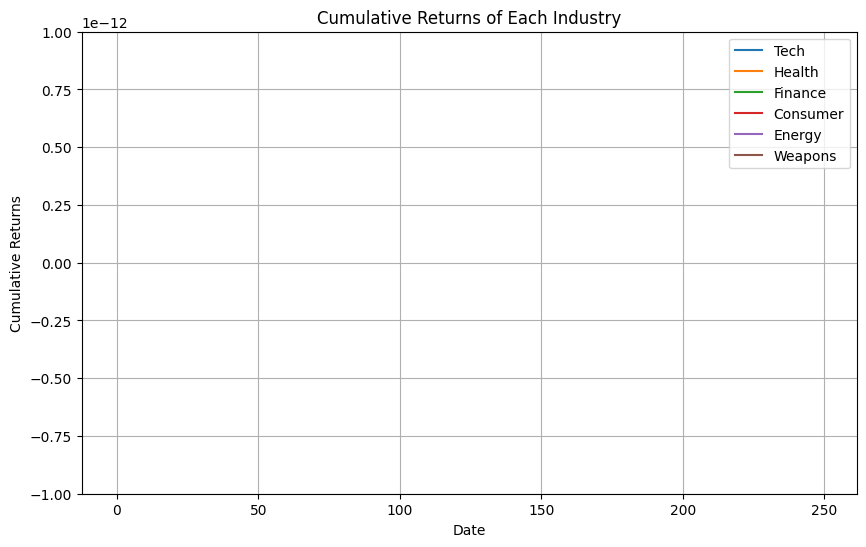

In [10]:
cumulative_returns = (1 + combined_df).cumprod()

cumulative_returns.plot(figsize=(10, 6))  # Adjust figsize as needed
plt.title('Cumulative Returns of Each Industry')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend()
plt.show()

# Monte Carlo Simulations

In [11]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [12]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-31', tz='America/New_York').isoformat()

In [13]:
# Specify the path to your .env file
dotenv_path = '/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/api.env'

# Load .env enviroment variables
load_dotenv(dotenv_path)

# Load environment variables
load_dotenv(dotenv_path)

# Access Alpaca API key ID
alpaca_api_key_id = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key_id,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
#tickers = ["AAPL","GOOG","MSFT","JNJ","PFE","UNH","JPM","BAC","V"]

timeframe = "1Day"

# Define the tickers and corresponding weights
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', ]  # Example tickers
weights = [0.25, 0.40, 0.25, 0.25]  # Example weights (25% each)

# Get bars data for the tickers
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [16]:
# Reorganize the DataFrame
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
GOOG = df_ticker[df_ticker['symbol']=='GOOG'].drop('symbol', axis=1)
MSFT = df_ticker[df_ticker['symbol']=='MSFT'].drop('symbol', axis=1)
JNJ = df_ticker[df_ticker['symbol']=='JNJ'].drop('symbol', axis=1)
PFE = df_ticker[df_ticker['symbol']=='PFE'].drop('symbol', axis=1)
UNH = df_ticker[df_ticker['symbol']=='UNH'].drop('symbol', axis=1)
JPM = df_ticker[df_ticker['symbol']=='JPM'].drop('symbol', axis=1)
BAC = df_ticker[df_ticker['symbol']=='BAC'].drop('symbol', axis=1)
V = df_ticker[df_ticker['symbol']=='V'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AAPL,GOOG,MSFT,JNJ,PFE,UNH,JPM,BAC,V], axis=1, keys=["AAPL","GOOG","MSFT","JNJ","PFE","UNH","JPM","BAC","V"])

# Display sample data
df_ticker.head()

AAPL                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2018-10-31 04:00:00+00:00  218.86  220.45  216.62      301129  216.88   
2018-11-01 04:00:00+00:00  222.22  222.36  216.81      505926  219.05   
2018-11-02 04:00:00+00:00  207.48  213.65  205.43      756041  209.55   
2018-11-05 05:00:00+00:00  201.59  204.39  198.17      569649  204.26   
2018-11-06 05:00:00+00:00  203.77  204.72  201.69      253890  201.92   

                                                 GOOG           ...  BAC  \
                             volume        vwap close high low  ... open   
timestamp                                                       ...        
2018-10-31 04:00:00+00:00  42444508  218.856231   NaN  NaN NaN  ...  NaN   
2018-11-01 04:00:00+00:00  59915448  217.683523   NaN  NaN NaN  ...  NaN   
2018-11-02 04:00:00+00:00  95135063  208.088580   NaN  NaN NaN  ...  NaN   
2018-11-05 05:00:00+00:00  68848036  200.964339   NaN  NaN NaN  ...  NaN   
2018-11-06 05:00:00+00:00  34030512  203.264572   NaN  NaN NaN  ...  NaN   

                                          V                                   \
                          volume vwap close high low trade_count open volume   
timestamp                                                                      
2018-10-31 04:00:00+00:00    NaN  NaN   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-01 04:00:00+00:00    NaN  NaN   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-02 04:00:00+00:00    NaN  NaN   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-05 05:00:00+00:00    NaN  NaN   NaN  NaN NaN         NaN  NaN    NaN   
2018-11-06 05:00:00+00:00    NaN  NaN   NaN  NaN NaN         NaN  NaN    NaN   

                                
                          vwap  
timestamp                       
2018-10-31 04:00:00+00:00  NaN  
2018-11-01 04:00:00+00:00  NaN  
2018-11-02 04:00:00+00:00  NaN  
2018-11-05 05:00:00+00:00  NaN  
2018-11-06 05:00:00+00:00  NaN  

[5 rows x 63 columns]

In [ ]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["AAPL"] = df_ticker["AAPL"]["close"]
df_closing_prices["GOOG"] = df_ticker["GOOG"]["close"]
df_closing_prices["MSFT"] = df_ticker["MSFT"]["close"]
df_closing_prices["JNJ"] = df_ticker["JNJ"]["close"]
df_closing_prices["PFE"] = df_ticker["PFE"]["close"]
df_closing_prices["UNH"] = df_ticker["UNH"]["close"]
df_closing_prices["JPM"] = df_ticker["JPM"]["close"]
df_closing_prices["BAC"] = df_ticker["BAC"]["close"]
df_closing_prices["V"] = df_ticker["V"]["close"]

# Check for NaN values in the 'V' column
# You need to explain 
v_nan_indices = df_closing_prices['V'].isna()
average_V = df_closing_prices['V'].mean()
df_closing_prices['V'] = df_closing_prices['V'].fillna(average_V)

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Ensure the index is in datetime format
df_closing_prices.index = pd.to_datetime(df_closing_prices.index)

df_closing_prices 

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Weights for each stock are assumed to be equal 
MC_two_year = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = 200,
    num_trading_days = 252*2
)

In [ ]:
# Printing the simulation input data
MC_two_year.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Get the matplotlib Axes object
ax = MC_thirty_year.plot_simulation()

# Customize the plot
for line in ax.lines:
    line.set_linewidth(0.5)  # Adjust line width

# Set title and labels
plt.title('Monte Carlo Simulation of 30-Year Cumulative Returns', fontsize=16)
plt.xlabel('Trading Days', fontsize=14)
plt.ylabel('Portfolio Value', fontsize=14)

# Add grid
plt.grid(True)

# Show plot
plt.show()